# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import time

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Wait for the page to load
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Create an empty list
rows = []


# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(rows, columns=headers)

In [11]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
print(f"Number of months on Mars: {mars_months}")

Number of months on Mars: 12


In [17]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
print(f"Number of Martian days of data: {total_sols}")

Number of Martian days of data: 1867


In [21]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(f"average minimum temperature by month:\n{avg_min_temp}")

average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


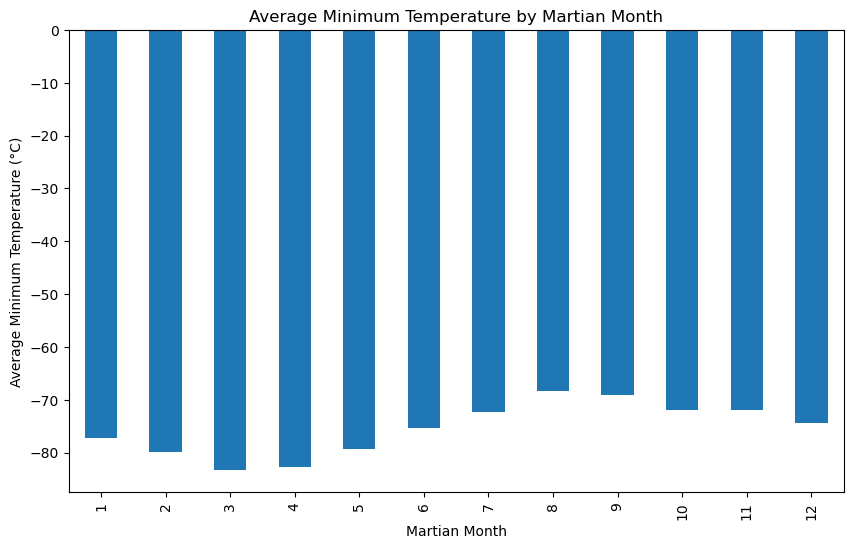

In [22]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Martian Month', figsize=(10, 6))
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_min_temp = avg_min_temp.sort_values()
coldest_month = sorted_min_temp.idxmin()
hottest_month = sorted_min_temp.idxmax()
print(f"Coldest month: {coldest_month} with an average minimum temperature of {sorted_min_temp.min():.2f}°C")
print(f"Hottest month: {hottest_month} with an average minimum temperature of {sorted_min_temp.max():.2f}°C")

Coldest month: 3 with an average minimum temperature of -83.31°C
Hottest month: 8 with an average minimum temperature of -68.38°C


In [24]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
print(f"average pressure by month:\n{avg_pressure}")

average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


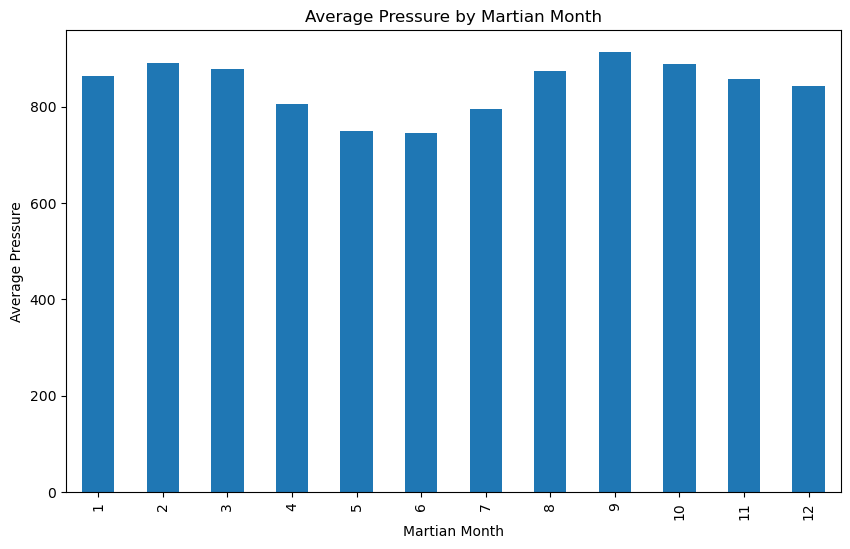

In [25]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Pressure by Martian Month', figsize=(10, 6))
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.show()

In [27]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure.sort_values()
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()
print(f"Lowest pressure month: {lowest_pressure_month} with an average pressure of {sorted_pressure.min():.2f}")
print(f"Highest pressure month: {highest_pressure_month} with an average pressure of {sorted_pressure.max():.2f}")

Lowest pressure month: 6 with an average pressure of 745.05
Highest pressure month: 9 with an average pressure of 913.31


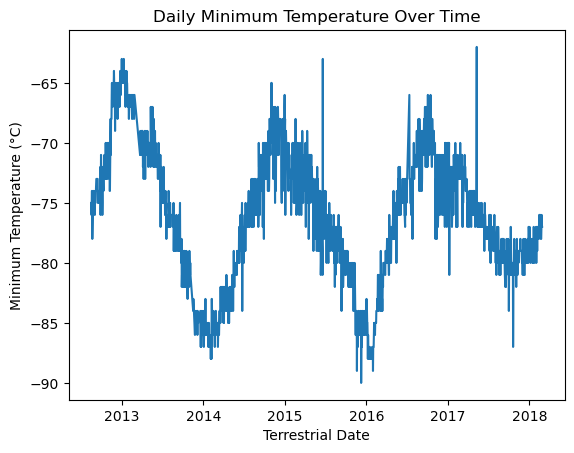

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'])
plt.title('Daily Minimum Temperature Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

#### Minimum Temperature

Minimum temperatures on Mars had an average of -83.31°C in the month of march.

The plot shows some cyclic patterns, suggesting seasonal changes. The coldest temperatures occur during months that look to be what Earth would consider spring time.

#### Atmospheric Pressure

The atmospheric pressure ranged from a minimum average of 745.05 in June and a maximum of 913.31 in September.

Atmospheric pressure also exhibits seasonal patterns, with higher pressures aligning with specific temperature cycles, showing potential atmospheric density changes during colder and warmer seasons.

#### Year Length

Based on the data's cyclic pattern and the timeline, there are roughly two full cycles in the dataset spanning 1,010.5 Earth days.

Each Martian year appears to last approximately 505 Earth days, close to the known value of ~687 Earth days. The discrepancy might be due to partial coverage or noise in the data.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_weather_df.to_csv('Outputs/mars_weather.csv', index=False)

In [30]:
browser.quit()